In [1]:
import sys
sys.path.append("..")

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from dsvit.dataset import BrainTumorDataset

In [3]:
dataset = BrainTumorDataset(root_dir="/Users/darshdave/Documents/BRAINTUMOR/DATASET/FILES/")
loader = DataLoader(dataset, batch_size=1, shuffle=False)

print(f"Total samples: {len(dataset)}")

Total samples: 3064


In [4]:
class PreEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 8, kernel_size=3, padding=1),  # output: (8, H, W)
            nn.BatchNorm2d(8),
            nn.ReLU(),
            nn.Conv2d(8, 16, kernel_size=3, padding=1), # output: (16, H, W)
            nn.BatchNorm2d(16),
            nn.ReLU()
        )

    def forward(self, x):
        return self.features(x)

Label: 1


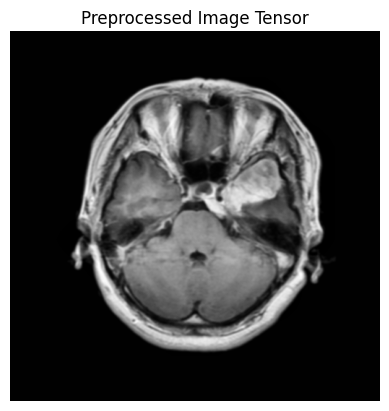

In [5]:
sample_img, sample_label = dataset[0]
print(f"Label: {sample_label}")
plt.imshow(sample_img.squeeze(0), cmap='gray')
plt.title("Preprocessed Image Tensor")
plt.axis('off')
plt.show()

In [6]:
pre_encoder = PreEncoder()
pre_encoder.eval()

with torch.no_grad():
    features = pre_encoder(sample_img.unsqueeze(0))

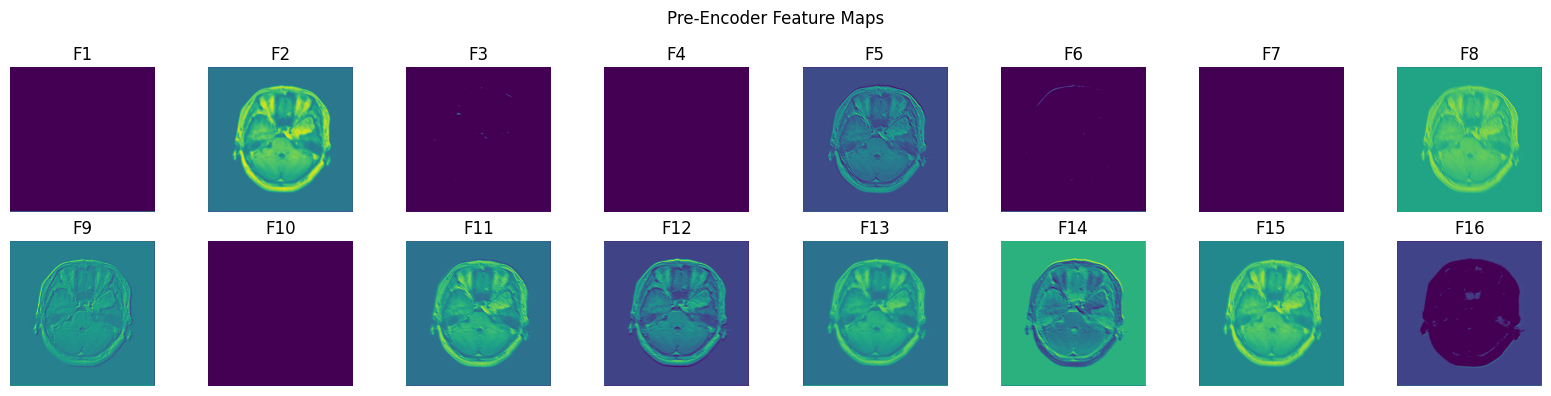

In [7]:
fig, axes = plt.subplots(2, 8, figsize=(16, 4))
fig.suptitle("Pre-Encoder Feature Maps")

for i in range(16):
    ax = axes[i // 8, i % 8]
    ax.imshow(features[0, i].numpy(), cmap='viridis')
    ax.set_title(f"F{i+1}")
    ax.axis('off')

plt.tight_layout()
plt.show()